In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
parameters = [0.349, -0.00115, 8.760, 730.300, 1745.322, 0.0139, -0.000277, 1.02025435, 0, 0, 0, 0, 0, 0, 0, 0.00362, -0.0143, -0.0116]

In [5]:
def fit(data, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17):
    FZ = data[0]
    SA = data[1]
    IA = data[2]

    C = a0
    D = FZ * (a1 * FZ + a2) * (1 - a15 * IA**2)
    
    BCD = a3 * np.sin(np.arctan(FZ / a4) * 2) * (1 - a5 * abs(IA))
    B = BCD / (C * D)
    H = a8 * FZ + a9 + a10 * IA

    E = (a6 * FZ + a7) * (1 - (a16 * IA + a17) * np.sign(SA + H))

    V = a11 * FZ + a12 + (a13 * FZ + a14) * IA * FZ
    Bx1 = B * (SA + H)

    return D * np.sin(C * np.arctan(Bx1 - E * (Bx1 - np.arctan(Bx1)))) + V

Front Inner Cx: 60.78
Front Outer Cx: 158.45
Rear Inner Cx: 36.04
Rear Outer Cx: 154.3


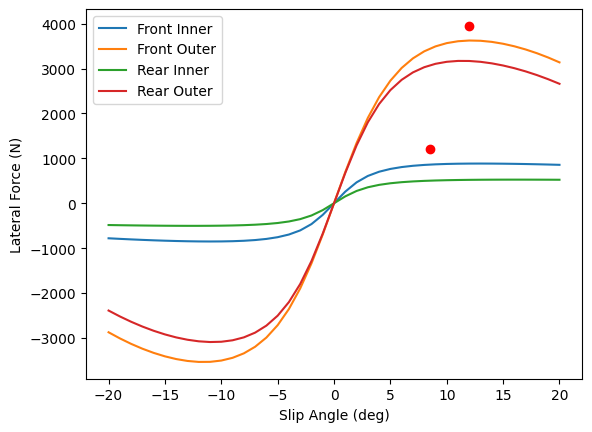

In [26]:
wheel_loads = np.array([-345.34, -1546.82, -199.66, -1343.76])
wheel_load_names = ["Front Inner", "Front Outer", "Rear Inner", "Rear Outer"]

i = 0
for normal_load in wheel_loads:
    
    lateral_force = fit([normal_load, range(-20, 21), -2], *parameters) * -1
    
    lower_bound = fit([normal_load, -0.05, -2], *parameters) * -1
    upper_bound = fit([normal_load, 0.05, -2], *parameters) * -1

    Cx = (upper_bound - lower_bound) / 0.1

    print(f"{wheel_load_names[i]} Cx: {round(Cx * 0.224809, 2)}")

    plt.plot([x for x in range(-20, 21)], lateral_force)

    i += 1

plt.legend(wheel_load_names)
plt.plot(12, 3950, 'ro')
plt.plot(8.5, 1200, 'ro')
plt.xlabel("Slip Angle (deg)")
plt.ylabel("Lateral Force (N)")
plt.show()

[[683.93, 694.25, 680.88, 708.37, 705.24, 706.27, 707.05, 709.34, 702.5], [131.05, 197.92, 114.1, 355.61, 303.16, 317.68, 330.16, 382.09, 270.51], [702.8, 708.55, 679.41, 709.9, 628.92, 637.03, 632.06, 659.35, 684.02], [367.37, 443.09, 212.98, 512.79, 24.08, 48.7, 33.43, 125.87, 236.87]]


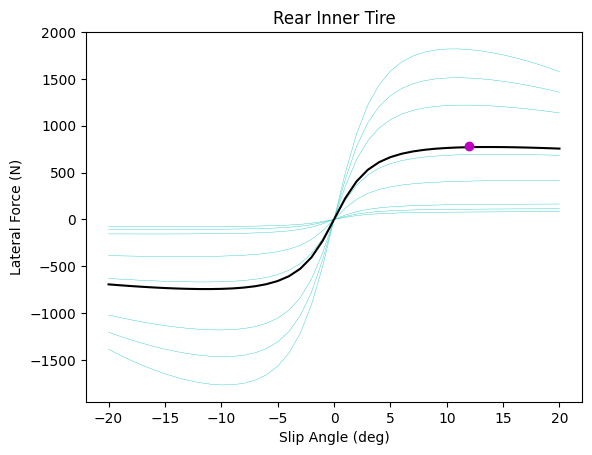

In [120]:
wheel_loads_1 = np.array([-1325.61, -162.49, -1513.21, -486.7])
wheel_loads_2 = np.array([-1411.33, -248.21, -1638.03, -611.52])
wheel_loads_3 = np.array([-1304.3, -141.18, -1294.49, -267.98])
wheel_loads_4 = np.array([-1631.77, -468.65, -1771.75, -745.24])
wheel_loads_5 = np.array([-1554.51, -391.39, -1056.12, -29.61])
wheel_loads_6 = np.array([-1575.41, -412.29, -1086.44, -59.93])
wheel_loads_7 = np.array([-1593.66, -430.54, -1067.63, -41.12])
wheel_loads_8 = np.array([-1672.86, -509.74, -1182.47, -155.96])
wheel_loads_mean = np.array([-1508.68, -345.56, -1326.27, -299.76])
wheel_load_names = ["Front Outer", "Front Inner", "Rear Outer", "Rear Inner"]
cornering_stiffnesses = [[], [], [], []]

all_wheel_loads = np.array(wheel_loads_1.tolist() + wheel_loads_2.tolist() + \
    wheel_loads_3.tolist() + wheel_loads_4.tolist() + wheel_loads_5.tolist() + \
    wheel_loads_6.tolist() + wheel_loads_7.tolist() + wheel_loads_8.tolist())

i = 0
for normal_load in all_wheel_loads:
    
    lateral_force = fit([normal_load, range(-20, 21), -2], *parameters) * -1
    
    lower_bound = fit([normal_load, -0.05, -2], *parameters) * -1
    upper_bound = fit([normal_load, 0.05, -2], *parameters) * -1

    Cx = round((upper_bound - lower_bound) / 0.1, 2)

    cornering_stiffnesses[i % 4].append(Cx)

    index = i % 4

    # if index == 0:
    #     plt.plot([x for x in range(-20, 21)], lateral_force, 'b', linewidth = 0.25)
    
    # if index == 1:
    #     plt.plot([x for x in range(-20, 21)], lateral_force, 'r', linewidth = 0.25)
    
    # if index == 2:
    #     plt.plot([x for x in range(-20, 21)], lateral_force, 'g', linewidth = 0.25)
    
    if index == 3:
        plt.plot([x for x in range(-20, 21)], lateral_force, 'c', linewidth = 0.25)

    i += 1

i = 0
for normal_load in wheel_loads_mean:
    
    lateral_force = fit([normal_load, range(-20, 21), -2], *parameters) * -1
    
    lower_bound = fit([normal_load, -0.05, -2], *parameters) * -1
    upper_bound = fit([normal_load, 0.05, -2], *parameters) * -1

    Cx = round((upper_bound - lower_bound) / 0.1, 2)

    cornering_stiffnesses[i % 4].append(Cx)

    if i == 3:
        plt.plot([x for x in range(-20, 21)], lateral_force, 'k')

    i += 1

print(cornering_stiffnesses)

plt.title("Rear Inner Tire")
# plt.legend(wheel_load_names)

# plt.plot(12, 3550, 'mo')
# plt.plot(12.25, 890, 'mo')
# plt.plot(11.1, 3150, 'mo')
plt.plot(12, 780, 'mo')

plt.xlabel("Slip Angle (deg)")
plt.ylabel("Lateral Force (N)")
plt.show()